# Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Reading Dataset

In [2]:
df = pd.read_csv('weather.csv')
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


# Exploring the Data

In [3]:
df.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

In [4]:
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [5]:
# checking if any null values in all columns
df.isnull().any()

Formatted Date              False
Summary                     False
Precip Type                  True
Temperature (C)             False
Apparent Temperature (C)    False
Humidity                    False
Wind Speed (km/h)           False
Wind Bearing (degrees)      False
Visibility (km)             False
Loud Cover                  False
Pressure (millibars)        False
Daily Summary               False
dtype: bool

In [6]:
# Getting count of Null values in each column
df.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [7]:
# Getting value counts of column 'Precip Type'
df['Precip Type'].value_counts()

rain    85224
snow    10712
Name: Precip Type, dtype: int64

In [8]:
# Replacing the null values of 'Precip type' with 'rain'
df.loc[df['Precip Type'].isnull(), 'Precip Type'] = 'rain'

In [9]:
# Rechecking for null values
df.isnull().sum()

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64

In [10]:
# Performing label encoding for categorical values
df.loc[df['Precip Type'] == 'rain', 'Precip Type'] = 0
df.loc[df['Precip Type'] == 'snow', 'Precip Type'] = 1

In [11]:
# Dropping the unnecessary columns "Formmated Data", Summary" & "Daily Summary"
df.drop(['Summary'], axis=1, inplace=True)
df.drop(['Daily Summary'], axis=1, inplace= True)
df.drop(['Formatted Date'], axis=1, inplace= True)
df.drop(['Loud Cover'], axis=1, inplace= True)
df.head()

,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,0,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,0,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,0,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,0,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51


# Data Preparation

In [12]:
# Dividing the features and target
X = df.drop(['Temperature (C)'], axis=1)
y = df['Temperature (C)']


In [13]:
y.head()

0    9.472222
1    9.355556
2    9.377778
3    8.288889
4    8.755556
Name: Temperature (C), dtype: float64

# Testing and Training Data

In [14]:
# splitting data into test and train data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [15]:
X_train.head()

,Precip Type,Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
43345,0,15.438889,0.96,10.8675,0.0,5.1359,1014.97
66832,0,1.133333,0.67,33.5041,302.0,11.3988,1010.07
92142,0,18.238889,0.97,5.7316,262.0,14.6832,1010.24
24092,0,10.227778,0.66,3.2200,310.0,9.9820,1018.47
35372,0,5.538889,0.76,14.0070,300.0,9.9820,1016.88


In [16]:
y_train.head()

43345    15.438889
66832     6.027778
92142    18.238889
24092    10.227778
35372     7.950000
Name: Temperature (C), dtype: float64

# Model Implementation

In [17]:
# Implementing LinearRegression model
from sklearn.linear_model import LinearRegression
linreg_model = LinearRegression()

In [18]:
# Training the model
linreg_model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
# Predicting the Data
y_predicted = linreg_model.predict(X_test)
print(y_predicted.shape)

(19291,)


# Evaluation of Model

In [20]:
# Calcluating the score
from sklearn.metrics import mean_squared_error
print('Mean Squared Error',mean_squared_error(y_test,y_predicted))

Mean Squared Error 0.8985428386217433


In [21]:
# print the coefficients
intercept = linreg_model.intercept_
coeff = linreg_model.coef_

In [22]:
# pair the feature names with the coefficients
feature_cols = X.columns
list(zip(feature_cols, linreg_model.coef_))

[('Precip Type', 0.04824190049761748),
 ('Apparent Temperature (C)', 0.8735254639277786),
 ('Humidity', -1.398753078305164),
 ('Wind Speed (km/h)', 0.08010324403148932),
 ('Wind Bearing (degrees)', -0.00040447586928432644),
 ('Visibility (km)', 0.009127691516366138),
 ('Pressure (millibars)', -0.00020701802095197952)]

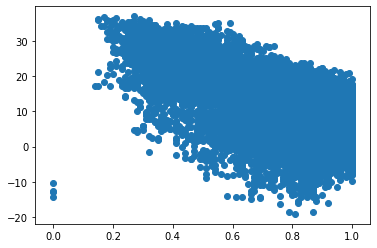

In [23]:
plt.scatter(X_test['Humidity'],y_predicted)

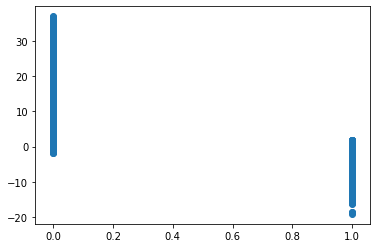

In [24]:
plt.scatter(X_test['Precip Type'],y_predicted)

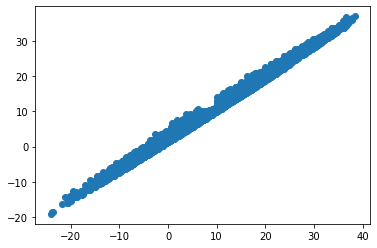

In [25]:
plt.scatter(X_test['Apparent Temperature (C)'],y_predicted)